In [1]:
import librosa as rosa
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

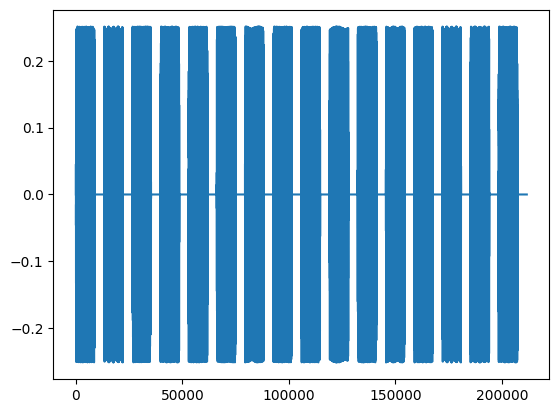

In [16]:
x, N1 = rosa.load("DTMF_Lab1.wav", sr=None)
plt.plot(x)

In [17]:
goertzel_freq = 8132
gap = int(N1 / 5)

In [25]:
k_group_1 = [697, 770, 852, 941]
k_group_2 = [1209, 1336, 1477, 1633]

def goertzel(x, N, k):
    c = 2 * np.cos(2 * math.pi * k / N1)
    g1, g2 = 0, 0
    for s in x:
        g = s + c * g1 - g2
        g2 = g1
        g1 = g
    mag = np.sqrt(g2 ** 2 + g1 ** 2 - c * g1 * g2)
    return mag

def find_k(group, x, N):
    result_k = 0
    X_max = 0
    for k in group:
        X_k = goertzel(x, N, k)
        if X_k > X_max:
            X_max = X_k
            result_k = k
    
    return result_k

def find_ks(x, N):
    return find_k(k_group_1, x, N), find_k(k_group_2, x, N)


In [26]:
table = pd.DataFrame(data = [[1, 2, 3, "A"], [4, 5, 6, "B"], [7, 8, 9, "C"], ["*", "0", "#", "D"]], 
             index=k_group_1, columns=k_group_2)
table

,1209,1336,1477,1633
697,1,2,3,A
770,4,5,6,B
852,7,8,9,C
941,*,0,#,D


In [23]:
point = 0
buttons = []
while point + gap < x.size:
    ks = find_ks(x[point:point + gap], 8192)
    buttons.append(table.loc[ks[0], ks[1]])
    point = point + gap + gap // 2

In [24]:
buttons
# # [1, 'A', 2, 'B', 3, 'C', 4, 'D', 5, '*', 6, '#', 7, 'A', 8, 'B']

[1, 'A', 2, 'B', 3, 'C', 4, 'D', 5, '*', 6, '#', 7, 'A', 8, 'B']